# Logistic regression with fixed feature vector

1. Generate N training data samples (N/2 from each class).

2. To evaluate different N's, use a single data set of training samples and collect your sample size for different N's by starting at index 0 until you have the desired number. This way you are comparing the most similar data points. 

3. Start with N=200 but try N=100 and N=400 afterwards to test the affect of N on "adequate" performance. 

4. Use Newton's method to train a classifier employing the non-kernelized logistic regression with explicit linear, quadratic, and cubic features. 


In [77]:
# import modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## Generate N training data samples (N/2 from each class)

In [108]:
loadPath = '/Users/mackenzie/Box/2020-2021/Classes/S21 ECE283 - Machine Learning/HW1/results/hw1prob3_sim_datapoints.txt'
X_orig = np.loadtxt(loadPath, dtype='float', delimiter=',')
print("Shape of data: ", np.shape(X_orig))

# reshape to two classes
X = np.reshape(X_orig, (2,2000,2), order='C')
print("Reshaped to represent classes: ", np.shape(X))

Shape of data:  (4000, 2)
Reshaped to represent classes:  (2, 2000, 2)


In [109]:
# define the "answers"
y0 = np.zeros(2000)
y1 = np.ones(2000)
ydata = np.append(y0,y1)
print(np.shape(y))

(4000,)


In [126]:
def get_samples(xdata, ydata, num_samples, num_samples_per_class_in_data=2000):
    # data (k x n x 2): data set to collect sampmles from
    # num samples: number of samples (1/2 will be collected from each class)
    
    num_classes = np.shape(xdata)[1]
    samples_per_class = int(num_samples / num_classes)
    
    class_xdata = []
    class_ydata = []
    for c in range(num_classes):
        class_xdata.append(xdata[c*num_samples_per_class_in_data:samples_per_class+c*num_samples_per_class_in_data])
        class_ydata.append(ydata[c*num_samples_per_class_in_data:samples_per_class+c*num_samples_per_class_in_data])
    
    
    class_xdata = np.array(class_xdata)
    class_xdata = np.reshape(class_xdata, (200,2), order='C')
    
    class_ydata = np.array(class_ydata)
    
    print("N samples: ", num_samples)
    print("x sample shape: ", np.shape(class_xdata))
    print("y sample shape: ", np.shape(class_ydata))
    print("Mean of y samples:", np.mean(class_ydata))
        
    return class_xdata, class_ydata
        

In [127]:
xx = get_samples(X_orig, ydata, num_samples=200)
print(xx[0:5][:])
print(xx[100:105][:])

N samples:  200
x sample shape:  (200, 2)
y sample shape:  (2, 100)
Mean of y samples: 0.5
(array([[ 1.464702e+00, -7.409450e-01],
       [ 6.381230e-01, -2.706210e-01],
       [ 1.164551e+00, -3.241120e-01],
       [-3.774420e-01,  8.174410e-01],
       [ 4.760430e-01,  1.666451e+00],
       [ 2.342507e+00,  3.655900e-02],
       [ 2.166620e+00,  7.140540e-01],
       [-1.067312e+00,  7.283120e-01],
       [ 9.088020e-01,  1.639499e+00],
       [-3.471640e-01, -4.592940e-01],
       [ 1.445950e-01,  6.429570e-01],
       [ 1.331356e+00, -1.287133e+00],
       [-2.774880e+00, -1.359270e-01],
       [-7.919960e-01,  2.531830e-01],
       [-6.638227e+00,  9.757410e-01],
       [-1.141564e+00,  1.898025e+00],
       [ 4.594400e-01, -2.574310e-01],
       [-1.510461e+00, -8.877400e-01],
       [ 2.627626e+00,  2.941670e-01],
       [ 1.163043e+00,  1.240640e-01],
       [ 1.519250e+00,  4.555600e-01],
       [ 4.335943e+00,  3.526080e-01],
       [ 2.363019e+00, -2.646290e-01],
       [ 4.

## Logistic regression in Python from scratch

Use Newton's method to train a classifier employing the non-kernelized logistic regression with explicit linear, quadratic, and cubic features. 

The following code is based off a stackoverflow post: 
https://stackoverflow.com/questions/49043061/inefficient-regularized-logistic-regression-with-numpy 

## 1.0 - define the sigmoid function

In [48]:
def sigmoid(theta, x):
    
    return 1/(1 + np.exp(-1 * theta.T.dot(x)))

## 2.0 - define the cost function

In [49]:
def cost_function(X, y, theta):
    
    s = 0
    
    for i in range(m):
        loss = -y[i] * np.log(sigmoid(theta, X[i])) - (1-y[i]*np.log(1-sigmoid(theta, X[i])))
        s += loss
    
    s /= m # divide s by s and assign that value to s
    s += (lamb/(2*m))*sum(theta[j]**2 for j in range(1,2))
    
    return s

## 3.0 - define the gradient

In [50]:
def gradient(theta, X, y):
    
    # add regularization terms
    add_column = theta * (lamb/m)
    add_column[0] = 0
    
    a = sum((sigmoid(theta, X[i]) - y[i])*X[i] + add_column for i in range(m))/m
    
    return a

## 4.0 - define the hessian

In [51]:
def hessian(theta, X, reg_matrix):
    
    matrix = []
    for i in range(3):
        row = []
        for j in range(3):
            cell = sum(sigmoid(theta, X[k])*(1-sigmoid(theta, X[k]))*X[k][i]*X[k][j] for k in range(m))
            row.append(cell)
        matrix.append(row)
    
    H = np.array(matrix)
    H = np.add(H, reg_matrix)
    
    return H           

## 5.0 - define Newtons method

In [44]:
def newtons_method(theta, iterations):
    
    for i in range(iterations):
        g = gradient(theta, X, y)
        H = hessian(theta, X, reg_matrix)
        theta = theta - np.linalg.inv(H).dot(g)
        cost = cost_function(X, y, theta)
        print(cost)
    return theta

---

## Setup iterative method

In [52]:
X_df = pd.DataFrame(X_orig, columns=['score1', 'score'])
y_df = pd.DataFrame(y, columns=['acceptance'])

m = len(y_df)

iterations = 15

ones = np.ones((m, 1))

X = np.array(X_df)
X = np.append(ones, X, axis=1)
y = np.array(y_df).flatten()

theta = np.array([0 for i in range(3)])

lamb = 1

reg_matrix = np.zeros((3,3), dtype=int) # n+1*n-1 regularization matrix
np.fill_diagonal(reg_matrix, 1)
reg_matrix[0] = 0
reg_matrix = (lamb/m)*reg_matrix

## Run the method

In [202]:
print(np.shape(X))

(2, 2000, 2)


In [203]:
theta = newtons_method(theta, iterations)
print(np.linalg.norm(theta))

TypeError: newtons_method() missing 5 required positional arguments: 'iterations', 'w', 'phix', 'y', and 'reg_identity_matrix'

The above was a copy/demonstration of code from the internet. I will now attempt to implement this based off the class notes.

---

## Regularized logistic regression from class notes

* phix = 2D array of datapoints for training: phix(x1, x2) where x1 and x2 and dimensions.
    * phix(x1,x2) = (1, x1, x2, x1^2, x2^2, x1x2, x1^3, x1^2x2, x1x2^2, x2^3)
    * For every data point (x1, x2) there is a feature vector (phix(x1, x2)) 
    * from notes: its components are terms of the form x[k] and x[k]x[j].
    
* y_i = 1D array of labels for phix: [0,...,0,1,...1].T (length: 200)
* y_i_hat = sigmoid(w, phix)
* lambda = hyperparameter >= 0.
* **w** = parameter we are trying to estimate via Newton iteration.

In [299]:
loadPath = '/Users/mackenzie/Box/2020-2021/Classes/S21 ECE283 - Machine Learning/HW1/results/hw1prob3_sim_datapoints.txt'
X_orig = np.loadtxt(loadPath, dtype='float', delimiter=',')

# define the "answers"
y0 = np.zeros(2000)
y1 = np.ones(2000)
ydata = np.append(y0,y1,axis=0)
#ydata = np.reshape(ydata, (4000,1))
print(np.shape(ydata))

(4000,)


In [318]:
def feature_vector(x,d=2):
    i, j = (0, 1)
    phi = [1, x[i], x[j], x[i]**2, x[j]**2, x[i]*x[j], x[i]**3, x[i]**2*x[j], x[i]*x[j]**2, x[j]**3]
    return phi

In [319]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [301]:
def get_samples(xdata, ydata, num_samples, num_samples_per_class_in_data=2000):
    # data (k x n x 2): data set to collect sampmles from
    # num samples: number of samples (1/2 will be collected from each class)
    
    num_classes = np.shape(xdata)[1]
    samples_per_class = int(num_samples / num_classes)
    
    class_xdata = []
    class_ydata = []
    for c in range(num_classes):
        class_xdata.append(xdata[c*num_samples_per_class_in_data:samples_per_class+c*num_samples_per_class_in_data])
        class_ydata.append(ydata[c*num_samples_per_class_in_data:samples_per_class+c*num_samples_per_class_in_data])
    
    
    class_xdata = np.array(class_xdata)
    class_xdata = np.reshape(class_xdata, (200,2), order='C')
    
    class_ydata = np.array(class_ydata)
    class_ydata = np.reshape(class_ydata, (200,1), order='C')
        
    return class_xdata, class_ydata

In [338]:
def sigmoid(w, phix):
    
    return 1/(1 + math.exp(-1*w.T.dot(phix)))

In [339]:
def cost_function(phix, y, w, num_samples, lamb):
    
    s = 0
    
    for i in range(num_samples):
        loss = -y[i] * np.log(sigmoid(w, phix[i])) - (1-y[i]*np.log(1-sigmoid(w, phix[i])))
        s += loss
    
    s /= num_samples # divide s by s and assign that value to s
    s += (lamb/2) * sum(w[j]**2 for j in range(1,10))
    
    return s

In [340]:
def gradient(w, phix, y, num_samples, lamb):
    
    # add regularization terms
    add_column = w * (lamb/num_samples)
    add_column[0] = 0
    
    a = sum((sigmoid(w, phix[i]) - y[i])*phix[i] + lamb * w for i in range(num_samples))
    
    return a

In [341]:
def hessian(w, phix, reg_identity_matrix, num_samples):
    
    matrix = []
    for i in range(10):
        row = []
        for j in range(10):
            cell = sum(sigmoid(w, phix[k])*(1-sigmoid(w, phix[k]))*phix[k][i]*phix[k][j] for k in range(num_samples))
            row.append(cell)
        matrix.append(row)
    
    H = np.array(matrix)
    H = np.add(H, reg_identity_matrix)
    
    print(is_pos_def(H))
    
    return H   

In [342]:
def newtons_method(num_samples, lamb, iterations, w, phix, y, reg_identity_matrix):
    
    costs = []
    
    for i in range(iterations):
        g = gradient(w, phix, y, num_samples, lamb)
        H = hessian(w, phix, reg_identity_matrix, num_samples)
        w = w - np.linalg.inv(H).dot(g)
        cost = cost_function(phix, y, w, num_samples, lamb)
        costs.append(cost)
        print("Iteration: {}; Cost: {}".format(i,cost))
        
        if cost < -1e9:
            break
        
    return w, costs

In [343]:
def logistic_regression_reg_newton(n=200, lmb=0, iters=10):

    # step 1: choose number of samples
    num_samples = n

    # step 2: choose lambda
    lamb = lmb

    # step 3: choose the number of iterations
    iterations = iters

    # ----- ----- -----

    # step 3: get samples
    x_data, y_data = get_samples(X_orig, ydata, num_samples)

    # step 4: setup my dataframes (only used in example to extract data frame)
    x_df = pd.DataFrame(X_orig, columns=['score1', 'score'])
    y_df = pd.DataFrame(ydata, columns=['acceptance'])

    # DATA USED:
    x = x_data
    y = y_data

    # step 5: calculate the feature vectors
    phix = []
    for k in range(num_samples):
        phix.append(feature_vector(x[k], d=2))

    # step 6: initialize our "w" term for Newton update (length=10 because of feature vector length)
    w = np.array([0 for i in range(np.shape(phix)[1])])

    # step 7: initialize the regularization matrix
    reg_identity_matrix = np.zeros((np.shape(phix)[1],np.shape(phix)[1]), dtype=int) 
    np.fill_diagonal(reg_identity_matrix, 1)


    # ----- ----- ----- 

    w, costs = newtons_method(num_samples, lamb, iterations, w, phix, y, reg_identity_matrix)
    print(np.linalg.norm(w))
    
    return(w, costs)

## Run everything parameterized

In [344]:
w, costs = logistic_regression_reg_newton(n=200, lmb=0, iters=10)

True
Iteration: 0; Cost: [-1.85922936]
True
Iteration: 1; Cost: [-2.38138113]
True
Iteration: 2; Cost: [-2.87079955]
True
Iteration: 3; Cost: [-3.32734126]
True
Iteration: 4; Cost: [-3.74842345]
True
Iteration: 5; Cost: [-4.33829574]
True
Iteration: 6; Cost: [-5.76696812]
True
Iteration: 7; Cost: [-inf]
6.0687244603098405


<ipython-input-339-21a88677cd5d>:6: RuntimeWarning: divide by zero encountered in log
  loss = -y[i] * np.log(sigmoid(w, phix[i])) - (1-y[i]*np.log(1-sigmoid(w, phix[i])))


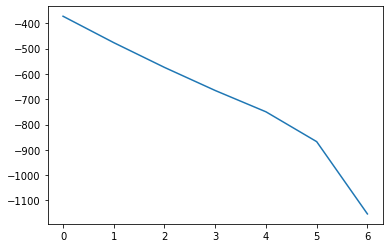

In [309]:
plt.plot(costs)

## Appendix of old code

In [89]:
"""
def get_samples(data, num_samples):
    # data (k x n x 2): data set to collect sampmles from
    # num samples: number of samples (1/2 will be collected from each class)
    
    num_classes = np.shape(data)[0]
    samples_per_class = int(num_samples / num_classes)
    
    class_data = []
    for c in range(num_classes):
        class_data.append(data[c,:samples_per_class,:])
    
    class_data = np.array(class_data)
    
    print("N samples: ", num_samples)
    print("sample shape: ", np.shape(class_data))
        
    return class_data
"""

'\ndef get_samples(data, num_samples):\n    # data (k x n x 2): data set to collect sampmles from\n    # num samples: number of samples (1/2 will be collected from each class)\n    \n    num_classes = np.shape(data)[0]\n    samples_per_class = int(num_samples / num_classes)\n    \n    class_data = []\n    for c in range(num_classes):\n        class_data.append(data[c,:samples_per_class,:])\n    \n    class_data = np.array(class_data)\n    \n    print("N samples: ", num_samples)\n    print("sample shape: ", np.shape(class_data))\n        \n    return class_data\n'